In [60]:
import pandas as pd

In [61]:
df=pd.read_csv('../transactions_merge.csv')

In [62]:
df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576863 entries, 0 to 2576862
Data columns (total 17 columns):
 #   Column                Dtype  
---  ------                -----  
 0   household_key         int64  
 1   BASKET_ID             int64  
 2   DAY                   int64  
 3   PRODUCT_ID            int64  
 4   QUANTITY              int64  
 5   SALES_VALUE           float64
 6   STORE_ID              int64  
 7   RETAIL_DISC           float64
 8   TRANS_TIME            int64  
 9   WEEK_NO               int64  
 10  COUPON_MATCH_DISC     float64
 11  MANUFACTURER          int64  
 12  DEPARTMENT            object 
 13  BRAND                 object 
 14  COMMODITY_DESC        object 
 15  SUB_COMMODITY_DESC    object 
 16  CURR_SIZE_OF_PRODUCT  object 
dtypes: float64(3), int64(9), object(5)
memory usage: 334.2+ MB


In [64]:
df.isnull().sum()

household_key           0
BASKET_ID               0
DAY                     0
PRODUCT_ID              0
QUANTITY                0
SALES_VALUE             0
STORE_ID                0
RETAIL_DISC             0
TRANS_TIME              0
WEEK_NO                 0
COUPON_MATCH_DISC       0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64

In [65]:
## Calculating Top Departments( Sales Wise)

dff=df.groupby(['DEPARTMENT'])['SALES_VALUE'].sum().reset_index().sort_values(by='SALES_VALUE',ascending=False)
dff['SALES_VALUE']=round(dff['SALES_VALUE'],0)

In [66]:
dff.head(10)

,DEPARTMENT,SALES_VALUE
16,GROCERY,4093811.0
9,DRUG GM,1055352.0
32,PRODUCE,557451.0
20,MEAT,548787.0
19,KIOSK-GAS,544222.0
21,MEAT-PCKGD,412426.0
7,DELI,260867.0
26,PASTRY,121740.0
23,MISC SALES TRAN,119960.0
25,NUTRITION,97669.0


In [67]:
## Calculating Top Manifacturers

df_top_mf=df.groupby(['MANUFACTURER'])['SALES_VALUE'].sum().reset_index().sort_values(by='SALES_VALUE',ascending=False)
df_top_mf['SALES_VALUE']=round(df_top_mf['SALES_VALUE'],0)

In [68]:
df_top_mf

,MANUFACTURER,SALES_VALUE
67,69,2178431.0
0,2,346817.0
762,764,165212.0
101,103,119344.0
1205,1208,114565.0
...,...,...
1367,1371,0.0
580,582,0.0
6037,6057,0.0
6199,6222,0.0


In [69]:
## Calculating Household Wise Total Orders(Frequency)

df_frequency=df.groupby(['household_key'])['PRODUCT_ID'].count().reset_index().sort_values(by='PRODUCT_ID',ascending=False)
df_frequency

,household_key,PRODUCT_ID
717,718,6746
2458,2459,6589
1608,1609,6583
1110,1111,6566
1452,1453,6521
...,...,...
1829,1830,7
1503,1504,7
521,522,7
1896,1897,5


In [70]:
## Calculating Household Wise Total Sales(Monetary)
df_monetary=df.groupby(['household_key'])['SALES_VALUE'].sum().reset_index().sort_values(by='SALES_VALUE',ascending=False)
df_monetary['SALES_VALUE']=round(df_monetary['SALES_VALUE'],0)

In [71]:
df_monetary

,household_key,SALES_VALUE
1022,1023,38320.0
1608,1609,27860.0
2321,2322,23647.0
1452,1453,21661.0
2458,2459,20672.0
...,...,...
521,522,29.0
688,689,29.0
2200,2201,28.0
1896,1897,20.0


In [72]:
today=105

In [73]:
## Calculating last order week
df_recency=df.groupby(['household_key'])['WEEK_NO'].last().reset_index().sort_values(by='WEEK_NO',ascending=False)
df_recency

,household_key,WEEK_NO
0,1,102
1353,1354,102
1369,1370,102
1368,1369,102
1366,1367,102
...,...,...
1829,1830,11
1896,1897,11
2200,2201,11
2264,2265,11


In [74]:
df_recency['Recency'] = today - df_recency['WEEK_NO']

In [75]:
from functools import reduce


In [76]:
df_finall=reduce(lambda x,y:pd.merge(x,y,on=['household_key'],how='left'),[df_frequency,df_monetary,df_recency])

In [77]:
df_finall.head()

,household_key,PRODUCT_ID,SALES_VALUE,WEEK_NO,Recency
0,718,6746,19300.0,102,3
1,2459,6589,20672.0,101,4
2,1609,6583,27860.0,102,3
3,1111,6566,18895.0,102,3
4,1453,6521,21661.0,102,3


In [99]:
df_finall.rename(columns={'PRODUCT_ID': 'Frequency', 
                         'SALES_VALUE': 'Monetary'}, inplace=True)

In [100]:
df_finall

,household_key,Frequency,Monetary,WEEK_NO,Recency
0,718,6746,19300.0,102,3
1,2459,6589,20672.0,101,4
2,1609,6583,27860.0,102,3
3,1111,6566,18895.0,102,3
4,1453,6521,21661.0,102,3
...,...,...,...,...,...
2495,1830,7,39.0,11,94
2496,1504,7,66.0,29,76
2497,522,7,29.0,71,34
2498,1897,5,20.0,11,94


In [80]:
RFMScores=df_finall[['household_key','Recency','Frequency','Monetary']]

C:\Users\karti\AppData\Local\Temp\ipykernel_12832\4017076091.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\karti\AppData\Local\Temp\ipykernel_12832\4017076091.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\karti\AppData\Local\Temp\ipykernel_12832\4017076091.py:11: UserWarning:



`distplot` i

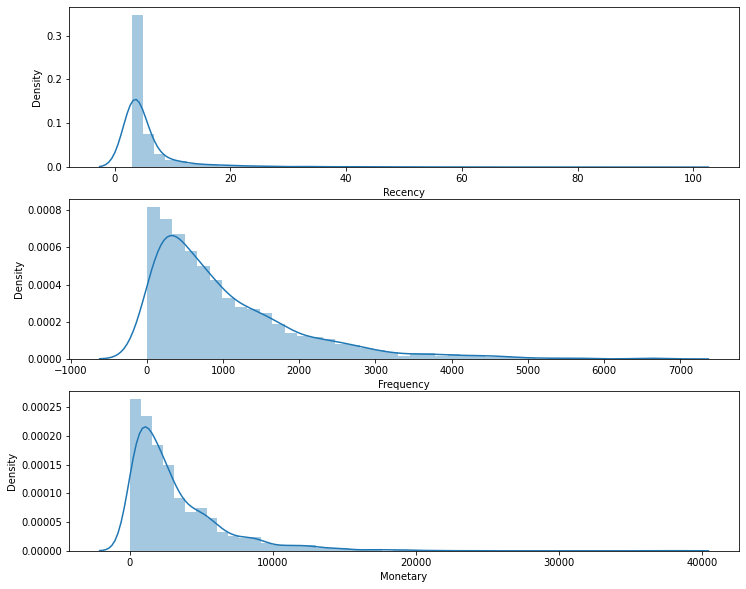

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(RFMScores['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(RFMScores['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(RFMScores['Monetary'])
# Show the plot
plt.show()

In [82]:
RFMScores

,household_key,Recency,Frequency,Monetary
0,718,3,6746,19300.0
1,2459,4,6589,20672.0
2,1609,3,6583,27860.0
3,1111,3,6566,18895.0
4,1453,3,6521,21661.0
...,...,...,...,...
2495,1830,94,7,39.0
2496,1504,76,7,66.0
2497,522,34,7,29.0
2498,1897,94,5,20.0


# Creating Quantiles to Segment Customers

In [83]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [84]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [85]:

#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,household_key,Recency,Frequency,Monetary,R,F,M
0,718,3,6746,19300.0,1,1,1
1,2459,4,6589,20672.0,2,1,1
2,1609,3,6583,27860.0,1,1,1
3,1111,3,6566,18895.0,1,1,1
4,1453,3,6521,21661.0,1,1,1


In [86]:

#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,household_key,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
0,718,3,6746,19300.0,1,1,1,111,3
1,2459,4,6589,20672.0,2,1,1,211,4
2,1609,3,6583,27860.0,1,1,1,111,3
3,1111,3,6566,18895.0,1,1,1,111,3
4,1453,3,6521,21661.0,1,1,1,111,3


In [87]:
RFMScores['RFMScore'].max()

12

In [88]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,index,household_key,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,0,718,3,6746,19300.0,1,1,1,111,3,Platinum
1,1,2459,4,6589,20672.0,2,1,1,211,4,Platinum
2,2,1609,3,6583,27860.0,1,1,1,111,3,Platinum
3,3,1111,3,6566,18895.0,1,1,1,111,3,Platinum
4,4,1453,3,6521,21661.0,1,1,1,111,3,Platinum


In [89]:
RFMScores['Monetary'].max()

38320.0

In [90]:
RFMScores.to_csv('RFM_Analysis.csv')

In [91]:
RFMScores[RFMScores['RFM_Loyalty_Level']=='Platinum']

,household_key,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,718,3,6746,19300.0,1,1,1,111,3,Platinum
1,2459,4,6589,20672.0,2,1,1,211,4,Platinum
2,1609,3,6583,27860.0,1,1,1,111,3,Platinum
3,1111,3,6566,18895.0,1,1,1,111,3,Platinum
4,1453,3,6521,21661.0,1,1,1,111,3,Platinum
...,...,...,...,...,...,...,...,...,...,...
1229,1691,3,746,2284.0,1,2,2,122,5,Platinum
1232,797,3,740,3060.0,1,2,2,122,5,Platinum
1241,228,3,736,2405.0,1,2,2,122,5,Platinum
1242,1800,3,735,3667.0,1,2,2,122,5,Platinum


In [92]:
df[df['household_key']==718]['MANUFACTURER'].nunique()

568

In [93]:
RFMScores[RFMScores['RFM_Loyalty_Level']=='Platinum']

,household_key,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,718,3,6746,19300.0,1,1,1,111,3,Platinum
1,2459,4,6589,20672.0,2,1,1,211,4,Platinum
2,1609,3,6583,27860.0,1,1,1,111,3,Platinum
3,1111,3,6566,18895.0,1,1,1,111,3,Platinum
4,1453,3,6521,21661.0,1,1,1,111,3,Platinum
...,...,...,...,...,...,...,...,...,...,...
1229,1691,3,746,2284.0,1,2,2,122,5,Platinum
1232,797,3,740,3060.0,1,2,2,122,5,Platinum
1241,228,3,736,2405.0,1,2,2,122,5,Platinum
1242,1800,3,735,3667.0,1,2,2,122,5,Platinum


In [94]:
df['MANUFACTURER'].nunique()

6453